In [113]:
# Initialize Otter
import otter
grader = otter.Notebook("HW_4_pinball.ipynb")

# HWK 4 pinball simulation

The full pinball simulation: slides https://docs.google.com/presentation/d/1fNTOc_4YXfBkQ_ko9X8eQqAgK3Opnn9c02i72sVDqKU/edit?usp=sharing

Full pinball 
 - position and velocity with Euler simulation (lecture activity, compute_next_step)
 - stop when ball passes below y=0 (lab, simulate_pinball version 1)
 - "Bouncing" off of the top and side walls (lab, outside_xx_wall, handle bounce, simulate_pinball version 1)
 - "Bouncing" off of bumpers (homework)

Week 1: 
- Circular "bumpers" OR a wall at an angle (circular bumpers add extra credit)
- [optional] Some bumpers will impart an acceleration to the pinball
- [optional] Add damping

Week 2: Some simple calculations
- Length of path pinball travels
- Integral of vx and vy


In [114]:
# The usual imports
import numpy as np
import matplotlib.pyplot as plt

In [115]:
# These commands will force JN to actually re-load the external file when you re-execute the import command
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<!-- BEGIN QUESTION -->

## Circular bumper or angled wall: How to implement?

TODO: Write code to handle a circular bumper OR an angled wall

- decide which functions/what the format of the functions should be written to handle a bumper or angled wall
- decide how you will represent a bumper or an angled wall

Note: You'll add tests and simulation and plotting in the following questions

This is a manually graded question

**TODO:** 

Use this cell to describe how you are implementing your bumper or angled wall routines
- How are you representing the bumper/angled wall?
- What functions are you creating and why? What are the function inputs and outputs?


In [116]:
# Imports from week 5
# This bit of code tells Jupyter notebooks to also look in the week_6_optimization folder for files
import os
import sys

# If you want them...
sys.path.insert(0, os.path.abspath('../Week_5_matrices'))

In [117]:
from pinball_routines import acceleration_due_to_gravity, compute_next_step, outside_wall, reflect_wall,outside_left_wall, outside_right_wall, outside_top_wall

In [118]:
# TODO: Write additional routines here
# You can write them here or put them in pinball_routines.py and import them here
# Add one cell for each function

#def place_bumpers(a, b, r):
    
    # The function takes in a and b as the x and y center of the bumper and r as the radius of the bumper
    # Using basic cartesian coordinates, The function returns the x and y coordinates of the bumper edges
    # While I am sure python can handle polar coords, I am not sure how to do it. I will stick to cartesian for now.

    # The bumpers are intended to be symetric about the y-axis. I am not usre if I will tackle that here or later.

    # Check if the radius of the bumper is too large... this could cause probelems given the symetry.
    if r > a or r > b:
        raise ValueError("The radius of the bumper is too large")
    
    xs_rads = np.linspace(a,a+r,10)
    xs_pos = xs_rads
    xs_neg = a-(xs_rads[1::1]-a)
    xs_neg = xs_neg[::-1]
    xs = np.concatenate((xs_neg,xs_pos)) 
    print(xs)
   
    ys_squared= r**2 - (xs-a)**2
    print(ys_squared)
    ys_top = np.abs(np.sqrt(ys_squared)+b)
    ys_top = ys_top[0:10]
    print(ys_top)
    ys_bottom = b-(ys_top[1::1]-b)
    ys_top = ys_top[::-1]
    ys = np.concatenate((ys_bottom,ys_top))
    print("ys")
    print(ys)
    bumper_edges = [xs,ys]
    print(bumper_edges)
    ret_bumper_edges = np.array(bumper_edges)
    return ret_bumper_edges


IndentationError: unexpected indent (1938533498.py, line 14)

In [ ]:
#-a)**2
    print(ys_squared)
    ys_top = np.sqrt(ys_squared)+b
    print(ys_top)
    ys_neg = -1*ys_pos
    ys = np.concatenate((ys_neg,ys_top))
    print(ys)
    bumper_edges = [xs,ys+b]
    print(bumper_edges)
    ret_bumper_edges = np.array(bumper_edges)
    return ret_bumper_edges


SyntaxError: unmatched ')' (3434461469.py, line 1)

In [ ]:
#def bumpers_colided (ball_loc, bumper_edges):
    # This function takes in the location of the ball and the edges of the bumpers
    # It returns a boolean array that is true if the ball has colided with the bumper
    # The ball_loc is a 2x1 array and the bumper_edges is a 2xN array
    # The function will return a 1xN array of booleans
    
   

In [119]:
#def plot_bumpers(bumper_edges,axes):
    # This function takes in the edges of the bumpers and plots them
    # The function returns nothing

    # I am not sure if I should plot the bumpers as a line or as a filled circle. I will start with a line
    xs = bumper_edges[0]
    ys
    axes.plot(bumper_edges[0],bumper_edges[1])
    plt.show() 

IndentationError: unexpected indent (298586382.py, line 6)

[array([2.5       , 2.49899334, 2.49597741, 2.49096435, 2.48397435,
       2.47503556, 2.46418397, 2.45146327, 2.43692469, 2.42062677,
       2.40263513, 2.38302222, 2.36186702, 2.33925471, 2.31527633,
       2.29002845, 2.26361273, 2.23613554, 2.20770751, 2.17844311,
       2.14846019, 2.11787947, 2.08682409, 2.0554191 , 2.02379096,
       1.99206702, 1.96037502, 1.92884258, 1.89759667, 1.86676309,
       1.83646602, 1.80682744, 1.77796669, 1.75      , 1.72303997,
       1.69719516, 1.67256963, 1.64926256, 1.62736778, 1.60697345,
       1.58816171, 1.57100829, 1.55558228, 1.54194577, 1.53015369,
       1.52025351, 1.51228511, 1.50628056, 1.50226404, 1.50025173,
       1.50025173, 1.50226404, 1.50628056, 1.51228511, 1.52025351,
       1.53015369, 1.54194577, 1.55558228, 1.57100829, 1.58816171,
       1.60697345, 1.62736778, 1.64926256, 1.67256963, 1.69719516,
       1.72303997, 1.75      , 1.77796669, 1.80682744, 1.83646602,
       1.86676309, 1.89759667, 1.92884258, 1.96037502, 1.9920

AttributeError: 'list' object has no attribute 'plot'

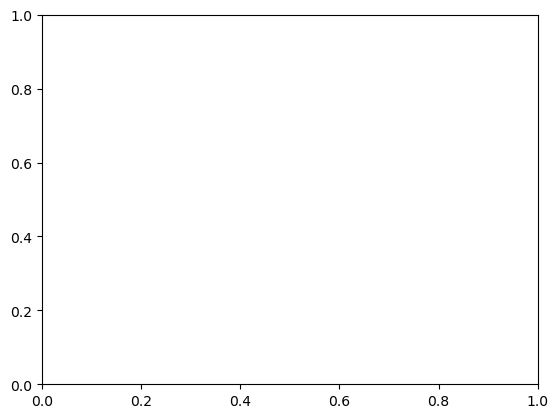

In [120]:
bumper_edges = place_bumpers(2,2,.5)
print(bumper_edges)
fig, ax = plt.subplots()
plot_bumpers(bumper_edges,ax)

In [121]:
def place_bumpers(a, b, r):
    
    # The function takes in a and b as the x and y center of the bumper and r as the radius of the bumper
    # The bumpers are intended to be symetric about the y-axis. I am not usre if I will tackle that here or later.

    # Check if the radius of the bumper is too large... this could cause probelems given the symetry.
    if r > a/2 or r > b/2:
        raise ValueError("The radius of the bumper is too large")

    theta = np.linspace(0,2*np.pi, 100)
    xs = r*np.cos(theta) + a
    ys = r*np.sin(theta) + b
    bumper_edges = [xs,ys]
    return bumper_edges

In [122]:
def plot_bumpers(axes, bumper_edges):
    # This function takes in the edges of the bumpers and plots them
    # The function returns nothing

    # I am not sure if I should plot the bumpers as a line or as a filled circle. I will start with a line
    axes.plot(bumper_edges[0],bumper_edges[1])
    

In [123]:
def bumper_colision(x_y,bumper_edges, a, b, r):
    # This function takes in the location of the ball and the edges of the bumpers
    # It returns true if the ball has colided with the bumper and none otherwise

    if abs(x_y[0]) > a-r and x_y[0] < a+r:
        y_bumper = np.sqrt(r**2 - (abs(x_y[0])-a)**2)
        if x_y[1] > b-y_bumper and x_y[1] < b+y_bumper:
            return True
    return False




In [124]:
def bumper_deflection(x_y, vx_vy, a, b, r):
    # This function takes in the location of the ball and the edges of the bumpers
    # It returns the new velocity of the ball after it colides with the bumper
    # I will take the normal vector to the bumper as the direction of the deflection

    radius_vec = np.array([x_y[0]-a,x_y[1]-b])
    normal_vec = radius_vec/np.linalg.norm(radius_vec)
    print(normal_vec)
    bounced_vec = vx_vy - 2*np.dot(vx_vy,normal_vec)*normal_vec
    print(bounced_vec)
    return bounced_vec


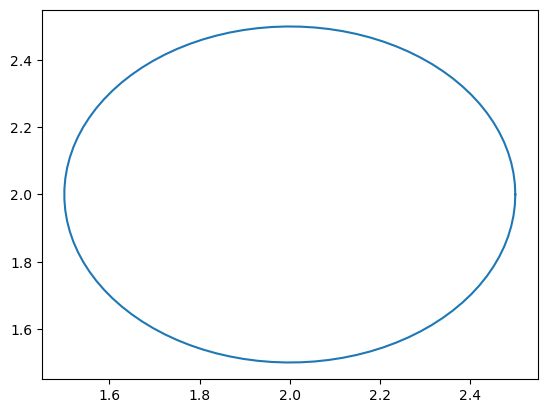

In [125]:

# TODO: Add tests here to test your functions
bumper_edges = place_bumpers(2,2,.5)
fig, ax = plt.subplots()
plot_bumpers(ax,bumper_edges)
plt.show()

In [126]:
x_y = [2.2,1.7]
test1 = bumper_colision(x_y,bumper_edges,2,2,.5)

x_y = [1.55,1.7]
test2 = bumper_colision(x_y,bumper_edges,2,2,.5)

x_y = [1.544,2.2]
test3 = bumper_colision(x_y,bumper_edges,2,2,.5)

x_y = [-1.544,2.2]
test4 = bumper_colision(x_y,bumper_edges,2,2,.5)

print(f"Test 1: {test1}, Test 2: {test2}, Test 3: {test3}, Test 4: {test4}")


Test 1: True, Test 2: False, Test 3: True, Test 4: True


In [127]:
reflect = bumper_deflection([2.3,1.6],[0,1],2,2,.5)
print(reflect)


[ 0.6 -0.8]
[ 0.96 -0.28]
[ 0.96 -0.28]


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Simulation routine

TODO: Copy over the simulation routine from your lab

- Change the function's parameters so that they take in the bumpers/angled wall as well
- Optional: If you implement acceleration or drag then describe it here 

This question is manually graded. Describe what you did, why, and how

TODO: Describe your solution here

In [128]:
# 


In [130]:
# Simulate pinball routine
#. TODO Copy your lab solution here
#       Change the parameters to support your circular bumpers or angled wall

def simulate_pinball(starting_state, top_wall=7, left_wall=-3, right_wall=3, bumper = 0, delta_t=0.1):
    """ Call compute one time step multiple times and store it in a numpy array
    @param starting_state - the starting positino, velocity, acceleration
    @param delta_t - the time step to use. Define a default t value that you've determined works well
    @return position values as a 2xtimesteps numpy array
    """

    # The returned array.We do not know the size, so do not pre-allocate
    ret_pose_all = []
    ret_velocities = []

    # TODO (question 1) Use a while loop instead of the for loop
    # Set the stopping criteria based on current state y value

    # TODO (question 2)
    # Add in each wall/top at a time (there are test routines for reach below)
    # Use if statements, not if-else statements, because it is possible to be outside of the top and side wall...
    ret_pose_all.append(starting_state[0])
    ret_velocities.append(starting_state[1])
    current_state = starting_state
    count = 0
    while True:
        # Compute the next step
        next_state = compute_next_step(current_state, delta_t)
        if outside_top_wall(next_state[0], top_wall):
            print("hit top wall")
            current_state[1,1] = -next_state[1,1]
            next_state = compute_next_step(current_state, delta_t)
        if outside_left_wall(next_state[0], left_wall):
            print("hit left wall")
            current_state[1,0] = -next_state[1,0]
            next_state = compute_next_step(current_state, delta_t)
        if outside_right_wall(next_state[0], right_wall):
            print("hit right wall")
            current_state[1,0] = -next_state[1,0]
            next_state = compute_next_step(current_state, delta_t)
        if bumper_colision(next_state[0],0,bumper[0], bumper[1], bumper[2]):
            print("hit bumper")
            current_state[1,:] = bumper_deflection(next_state[0],next_state[1],bumper[0],bumper[1],bumper[2])
            next_state = compute_next_step(current_state, delta_t)
        # Append the current position to the list
        #print(next_state)
        ret_pose_all.append(next_state[0])
        ret_velocities.append(next_state[1])
        current_state = next_state
        count += 1
        #print(count)

        if current_state[0,1] < 0.0:
            break
            
    ret_pose_all = np.array(ret_pose_all).transpose()
    ret_velocities = np.array(ret_velocities).transpose()
    # All done - return the numpy array
    return ret_pose_all, ret_velocities

In [131]:
# Time step
delta_t = 0.01

top_wall = 5.0
left_wall = -3.0
right_wall = 3.0

# Test 1 - do you stop when you hit the floor?
starting_state = np.zeros([3, 2])  # location, velocity, acceleration
starting_state[0, :] = [0, 0] # Start at zero, zero
starting_state[1, :] = [2.4, 8.5]
starting_state[2, :] = [0.0, acceleration_due_to_gravity()]
bumper = [2,2,.5]


# Define your bumper/angled wall here
# Default is top wall at y=5, left/right walls at +- 3.0


hit right wall
hit bumper
[0.98081971 0.19491714]
[ 4.40089437 -4.35846633]
hit right wall


In [132]:
# Test the simulate_pinball function, with at least setup
ret_poses, ret_velocities = simulate_pinball(starting_state, 5, -3, 3, bumper, delta_t)

hit right wall
hit bumper
[0.98081971 0.19491714]
[ 4.40089437 -4.35846633]
hit right wall


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Plot bumpers or angled wall, walls, and path

TODO: Start with the plotting code from the lab
 - add plotting the bumpers or angled wall
 - pass the data structure you use to define the bumpers and walls to the plot routine
 
TODO: Generate at least 2 plots showing the pinball doing different behaviors (must include reflection off of wall, bumper[s]/angled wall)

This question is manually graded

In [133]:
# TODO: Create a function to plot the pinball track, walls, and bumpers
#  Start with the lab plot
def plot_pinball_lab(axs, ret_poses, walls, bumper_edges, total_time):
    """ plot the results of running the system AND the "correct" closed form result
    @param ret_poses - x y position values in a 2xn numpy array
    @param walls - The walls and ceiling locations (top, left, right)
    @param total_time - the total time the system ran (for closed form solution, delta_t * n time steps)
    @return Nothing
    """
    # The values we calculated in calculate_n_time_steps
    axs.plot([walls[1], walls[2]], [walls[0], walls[0]], '-m', label=f"Top wall {top_wall}")
    axs.plot([walls[1], walls[2]], [0, 0], '-k', label="Floor wall")
    axs.plot([walls[1], walls[1]], [0, walls[0]], '-g', label="Left wall")
    axs.plot([walls[2], walls[2]], [0, walls[0]], '-g', label="Right wall")
    axs.plot(bumper_edges[0],bumper_edges[1], '-r', label="Bumper")
    axs.plot(-bumper_edges[0],bumper_edges[1], '-r', label="Bumper")

    axs.plot(ret_poses[0, 0], ret_poses[1, 0], 'xr', label="Start")
    axs.plot(ret_poses[0, :], ret_poses[1, :], '.-k', label="Poses")

    axs.axis('equal')
    axs.set_title(f"Boring pinball, 0-{total_time} s")
    axs.legend()
    

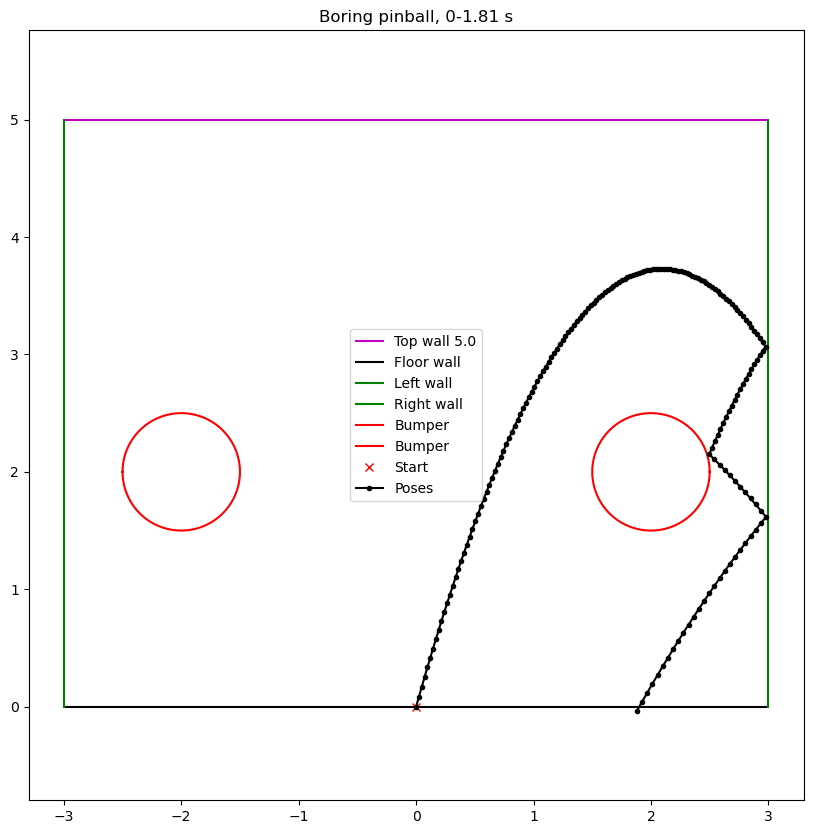

In [134]:
fig, ax = plt.subplots(figsize=(10, 10))

total_time = delta_t * ret_poses.shape[1]
plot_pinball_lab(ax, ret_poses, [5, -3, 3], bumper_edges, total_time)

hit right wall
hit bumper
[-0.99443458 -0.1053559 ]
[93.74715777 39.77302544]
hit right wall
hit top wall
hit left wall
hit bumper
[-0.99834994  0.05742301]
[-97.67712715 -28.65783961]
hit left wall


C:\Users\yeasshhhh\AppData\Local\Temp\ipykernel_17512\2032869220.py:6: RuntimeWarning: invalid value encountered in sqrt
  y_bumper = np.sqrt(r**2 - (abs(x_y[0])-a)**2)


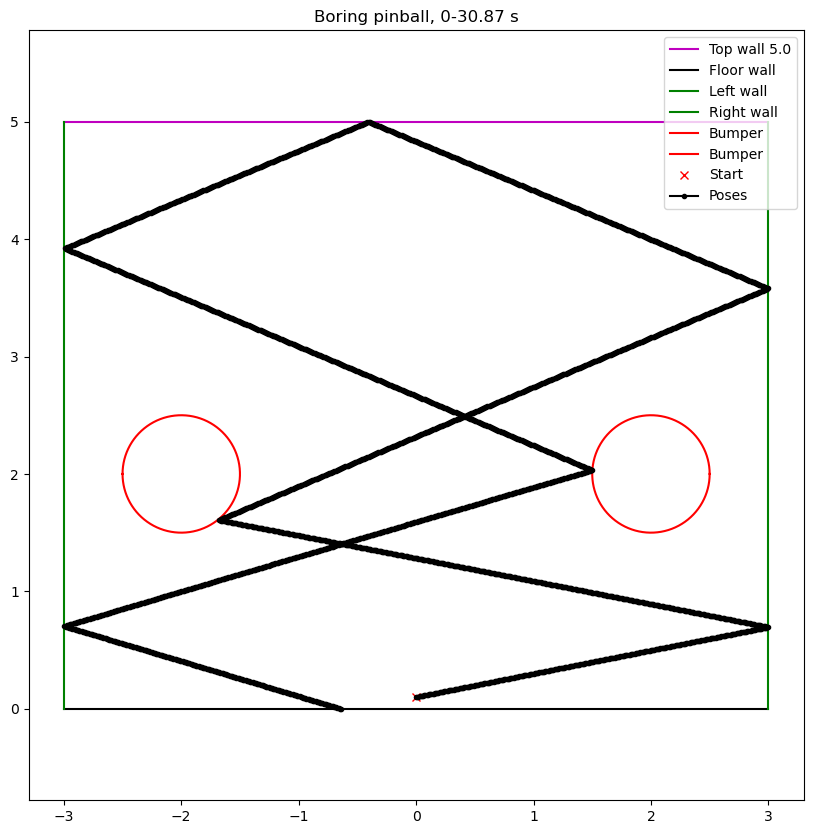

In [137]:
# TODO: set up different starting positions and/or pinball setups and plot them

delta_t2 = 0.0001
starting_state = np.array([[0,0.1],[100,20],[0,acceleration_due_to_gravity()]])
ret_poses2, ret_velocities = simulate_pinball(starting_state, 5, -3, 3, bumper, delta_t2)
total_time2 = delta_t * ret_poses2.shape[1]

fig, ax = plt.subplots(figsize=(10, 10))
plot_pinball_lab(ax, ret_poses2, [5, -3, 3], bumper_edges, total_time2)


In [ ]:
# I originally tried to use cartesian cordinates with r^2 = x^2 + y^2. This became a unwieldy and I abandond it.
# I google how to draw a cirlce in python and came up with the using trigonometric fucntions and this worked much better. 
# The colision detection is a little odd. ONe of the bigest problems I ran into is how python handles the square root of a negative number.
# The collision detection sees if the ball is within the x range of the bumper and then uses the x value of the ball to calculate the y value of the bumper.
# for bouncing the ball, I had originally taken the found a line from the center of the bumper to the xy location where the ball hts the bumper.
# I rotated this 90 degrees to get asimulated wall by running it trough  a matix. then I reflected the ball. Thies had several cases where it would not work.
# I found similar code online that used the normal vector to the bumper to reflect the ball. The normal vector was just the vector from the center of the bumper to the ball which I had been using but found much simpler ways to code it.
# then the ball gets reflected so that the angles where the ball comaes in and goes out are the same about the normal vector.
# I tried to program in symetry about the y axis but have a few bugs. Somewhere I need to either take a negative value or and abs(). 

In [136]:
# Manual grade
print("This is a manually-graded question; there is no grader.check() function. See rubric and slides for more information on expected output.")

This is a manually-graded question; there is no grader.check() function. See rubric and slides for more information on expected output.


<!-- END QUESTION -->

## Week 2 - Use integration to calculate length of path

TODO: Calculate the length of the pinball path using euclidian distances

In [138]:
def length_of_pinball_path(poses):
    """ Calculate the length of the pinball path using euclidian distances
    @param poses - the x,y poses
    @return length"""
    # TODO: Sum up the distance between all of the pose points
    # Reminder: Distance is sqrt(x^2 + y^2)

    distances = np.zeros(poses.shape[1]-1)
    for i in range(poses.shape[1]-1):
        distances[i] = np.sqrt((poses[0,i+1]-poses[0,i])**2 + (poses[1,i+1]-poses[1,i])**2)
    return np.sum(distances)
    return 0.0
    # END PROMPT """

In [139]:
# TODO For these tests use this starting state
#  - do NOT place a bumper/wall in the path - it should just go up and down
#  - Use the given starting position and velocity
#  - Use a delta t of 0.01
#  - Do NOT do damping
starting_state = np.zeros([3, 2])  # location, velocity, acceleration
starting_state[0, :] = [0, 0] # Start at zero, zero
# Velocity - mostly up with a bit of x noise
starting_state[1, :] = [0.5, 3.5]
starting_state[2, :] = [0.0, acceleration_due_to_gravity()]

# TODO: call your simulate routine with  delta_t = 0.01 and the above starting state

ret_poses, velocities = simulate_pinball(starting_state, 5, -3, 3, [0,0,0], 0.01)
# END PROMPT """


In [140]:
# poses check - 
len_path = (length_of_pinball_path(ret_poses))
print(f"Distance traveled {len_path}, expected 1.386298")

Distance traveled 1.3862984861585559, expected 1.386298


In [141]:
grader.check("integrate_path")

integrate_path results: All test cases passed!

## Integrate x velocity and y velocity

TODO: Calculate the total relative distance the pinball traveled in x and y by integrating the velocity in x and y
- TODO: Change your simulation code so it returns velocities in addition to poses
- Call trapz with the vx values, using a fixed dx (delta_t) (this is the integral)

In [142]:
# EXAMPLE CODE
# To return the velocities in addition to the poses you want to
#   1) replicate your code for storing the positions, only this time, store the velocities
#   2) return the velocities as well as the positions
#   3) extract the velocities out

# There's two ways to do this, either as a 4xn array (get the velocities out afterwards, or two 2xn arrays)
n = 10
ret_vals = np.zeros((4, n))  # storing x, y, vx, vy in each column
x = 0
y = 0
vx = 0.1
vy = 0.2
state = np.zeros((2, 2))
state[0, :] = [x, y]    # First row is position
state[1, :] = [vx, vy]  # Second row is velocity
for i in range(0, n):
    ret_vals[0:2, i] = state[0, :]   # put the current state position in the first two rows
    ret_vals[2:4, i] = state[1, :]   # put the current state position in the 3rd and fourth rows

    # Increment state
    state[0, :] = state[0, :] + state[1, :] * 0.1
# return ret_vals
    
# Calling function
poses = ret_vals[0:2, :]
vels = ret_vals[2:4, :]

# OR
ret_poses = np.zeros((2, n))  # storing x, y in each column
ret_vels = np.zeros((2, n))  # storing vx, vy in each column
x = 0
y = 0
vx = 0.1
vy = 0.2
state = np.zeros((2, 2))
state[0, :] = [x, y]    # First row is position
state[1, :] = [vx, vy]  # Second row is velocity
for i in range(0, n):
    ret_poses[0:2, i] = state[0, :]   # put the current state position in the first two rows
    ret_vels[0:2, i] = state[1, :]   # put the current state position in the 3rd and fourth rows

    # Increment state
    state[0, :] = state[0, :] + state[1, :] * 0.1

# return ret_poses, ret_vels
# poses, vels = func()


In [143]:
def integral_of_path_velocity(velocities, delta_t):
    """ Calculate the x and y distance traveled of the pinball path by integrating the velocities
    @param velocities - the vx,vy velocities at each time step
    @param delta_t - the sampling used to generate the velocities
    @return integral of vx, integral of vy"""
    # TODO: Calculate the integral of vx and vy
    # Note: You'll want trapz because these are samples of the velocity function

    integral_x = np.trapz(velocities[0,:], dx=delta_t)
    integral_y = np.trapz(velocities[1,:], dx=delta_t)
    
    return integral_x, integral_y
    # END PROMPT """

In [144]:
# This needs to be a 2xn array of the velocities at each time step
ret_velocities = velocities
# END PROMPT """

# Note - make sure you're using the starting state given in the path integration
integral_x, integral_y = integral_of_path_velocity(ret_velocities, delta_t)
print(f"Integral of x velocity {integral_x}, expected 0.365")
print(f"Integral of y velocity {integral_y}, expected -0.056209")

Integral of x velocity 0.365, expected 0.365
Integral of y velocity -0.05620999999999904, expected -0.056209


In [145]:
grader.check("integrate_velocity")

integrate_velocity results: All test cases passed!

## Hours and collaborators
Required for every assignment - fill out before you hand-in.

Listing names and websites helps you to document who you worked with and what internet help you received in the case of any plagiarism issues. You should list names of anyone (in class or not) who has substantially helped you with an assignment - or anyone you have *helped*. You do not need to list TAs.

Listing hours helps us track if the assignments are too long.

In [147]:

# List of names (creates a set)
worked_with_names = {"none"}
# List of URLS TCW3 (creates a set)
websites = {"<https://stackoverflow.com/questions/54543170/angle-reflexion-for-bouncing-ball-in-a-circle>"}
# Approximate number of hours, including lab/in-class time
hours = 14

In [148]:
grader.check("hours_collaborators")

hours_collaborators results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Submit through gradescope, homework 4 pinball. Don't forget pinball_routines.py

In [150]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...



KeyboardInterrupt: 